# Exploration des données

In [1]:
# Importation des bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Charger le fichier CSV
data = pd.read_csv('covid.csv')

# Afficher les premières lignes du fichier
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
# Obtenir des informations générales sur les colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44521 non-null  object 
 1   continent                        44257 non-null  object 
 2   location                         44785 non-null  object 
 3   date                             44785 non-null  object 
 4   total_cases                      44182 non-null  float64
 5   new_cases                        43982 non-null  float64
 6   new_cases_smoothed               43200 non-null  float64
 7   total_deaths                     44182 non-null  float64
 8   new_deaths                       43982 non-null  float64
 9   new_deaths_smoothed              43200 non-null  float64
 10  total_cases_per_million          43918 non-null  float64
 11  new_cases_per_million            43918 non-null  float64
 12  new_cases_smoothed

In [5]:
# Dimensions du fichier
data.shape

(44785, 41)

In [7]:
# Résumé statistique des données numériques
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.418200e+04,43982.000000,43200.000000,44182.000000,43982.000000,43200.000000,43918.000000,43918.000000,43135.000000,43918.000000,...,39442.000000,26322.000000,39967.000000,41366.000000,31358.000000,30963.000000,18658.000000,36139.000000,43963.000000,38558.000000
mean,9.372153e+04,1388.770224,1372.258368,3885.163189,43.323360,43.329499,1778.176471,23.573850,23.160618,55.320410,...,20979.943732,12.029018,251.347231,8.048869,10.834007,32.637049,52.576272,3.115428,74.052595,0.725580
std,9.707004e+05,12665.458657,12420.794948,36227.966483,366.554434,356.193423,3814.416468,72.289186,55.613758,140.662359,...,20466.166309,19.158253,117.620708,4.143192,10.481952,13.408593,31.579386,2.530433,7.364382,0.152673
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.300000e+01,0.000000,0.571000,0.000000,0.000000,0.000000,25.373750,0.000000,0.123000,0.000000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000,0.606000
50%,9.370000e+02,9.000000,14.143000,17.000000,0.000000,0.143000,266.509000,1.475500,2.838000,4.566000,...,14103.452000,1.800000,238.339000,7.110000,6.400000,31.400000,55.182000,2.500000,75.490000,0.755000
75%,9.989000e+03,156.000000,160.857000,213.000000,3.000000,3.000000,1793.012500,16.551500,18.200500,33.616750,...,32415.132000,16.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000,0.853000
max,3.054045e+07,313658.000000,288630.000000,952724.000000,10491.000000,7456.714000,42663.811000,4944.376000,882.924000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [9]:
data.describe(include='object')

,iso_code,continent,location,date,tests_units
count,44521,44257,44785,44785,18374
unique,211,6,212,264,5
top,AFG,Europe,Afghanistan,2020-09-01,tests performed
freq,264,11814,264,212,9548


In [11]:
# Résumé des données catégoriques
categorical_columns = data.select_dtypes(include=['object']).columns
print("Colonnes catégoriques et leurs valeurs uniques :")
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} valeurs uniques")

Colonnes catégoriques et leurs valeurs uniques :
iso_code: 211 valeurs uniques
continent: 6 valeurs uniques
location: 212 valeurs uniques
date: 264 valeurs uniques
tests_units: 5 valeurs uniques


In [12]:
# Vérifier les valeurs manquantes
data.isnull().sum()

iso_code                             264
continent                            528
location                               0
date                                   0
total_cases                          603
new_cases                            803
new_cases_smoothed                  1585
total_deaths                         603
new_deaths                           803
new_deaths_smoothed                 1585
total_cases_per_million              867
new_cases_per_million                867
new_cases_smoothed_per_million      1650
total_deaths_per_million             867
new_deaths_per_million               867
new_deaths_smoothed_per_million     1650
new_tests                          29138
total_tests                        28763
total_tests_per_thousand           28763
new_tests_per_thousand             29138
new_tests_smoothed                 27217
new_tests_smoothed_per_thousand    27217
tests_per_case                     28636
positive_rate                      28252
tests_units     

In [15]:
# Vérification de la plage de dates si une colonne 'date' est présente
print(f"Min : {data['date'].min()}, Max : {data['date'].max()}")

Min : 2019-12-31, Max : 2020-09-19


In [17]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64


In [19]:
data.duplicated().sum()

0

In [21]:
data.columns.tolist()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

# Nettoyage des données

In [24]:
# Remplir les colonnes numériques avec la médiane
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [26]:
# Remplir les colonnes catégoriques avec le mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)  # Affectation explicite pour éviter les warning

In [28]:
data.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
p

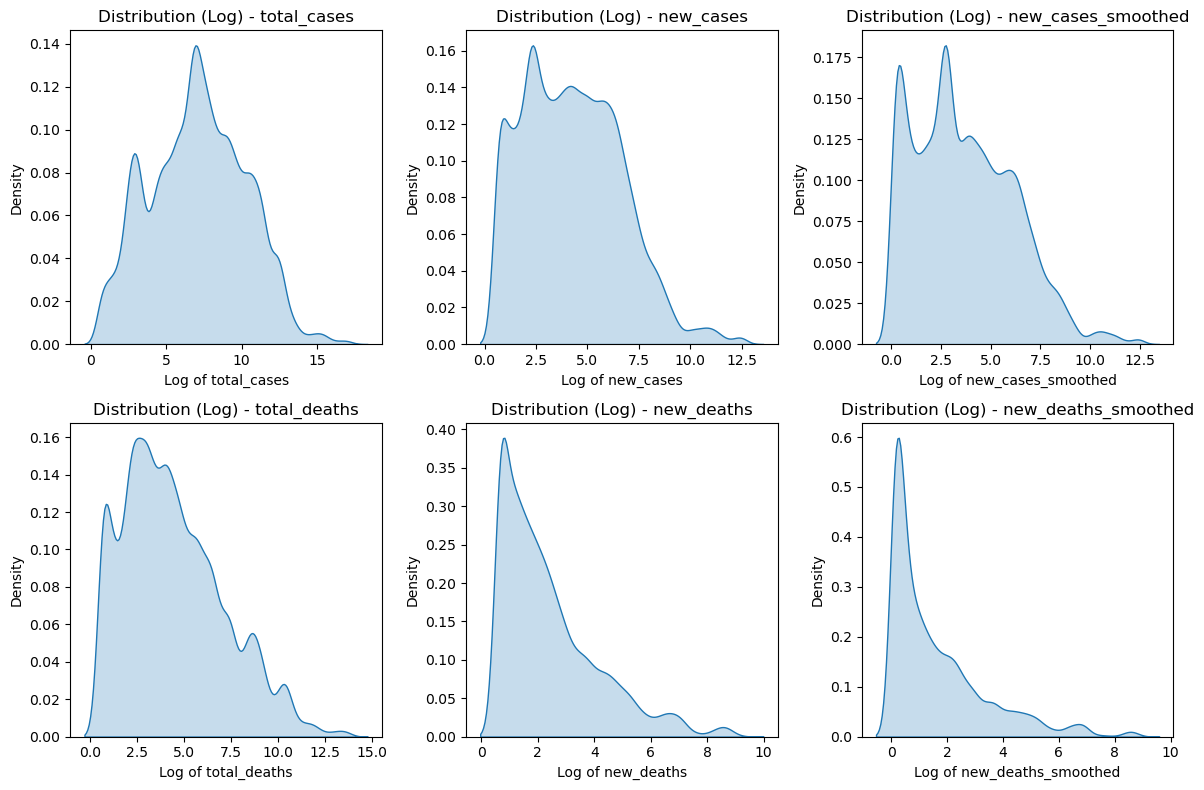

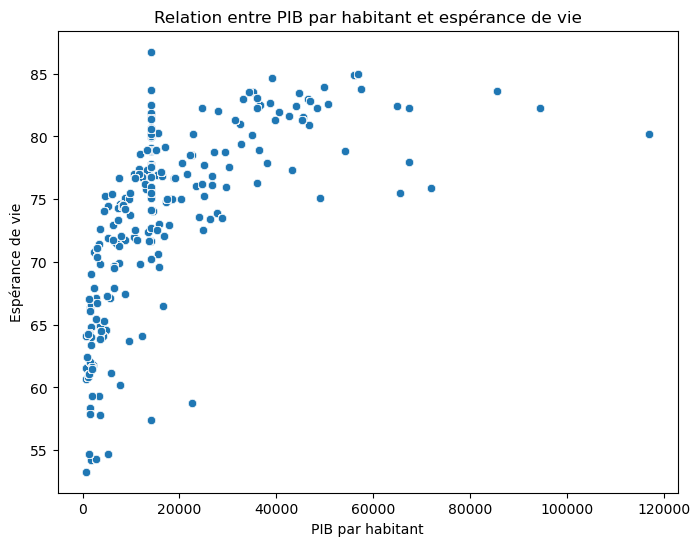

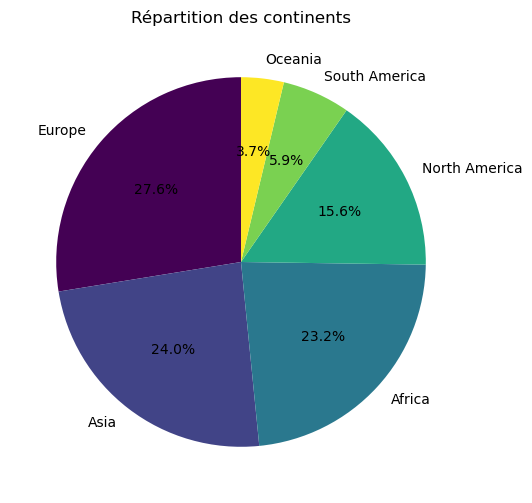

In [34]:
# 1. Histogrammes des colonnes numériques
numeric_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns[:6]):  # Limité à 6 colonnes pour une vue claire
    plt.subplot(2, 3, i + 1)
    if (data[col] > 0).sum() > 0:  # Vérifie que la colonne contient des valeurs positives pour le log
        sns.kdeplot(np.log1p(data[col][data[col] > 0]), fill=True)  # Transformation logarithmique
        plt.title(f'Distribution (Log) - {col}')
        plt.xlabel(f'Log of {col}')
    else:
        sns.kdeplot(data[col], fill=True)  # Pour les colonnes qui n'ont pas besoin de log
        plt.title(f'Distribution - {col}')
        plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()



# 2. Scatter plot entre quelques variables clés
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gdp_per_capita', y='life_expectancy', data=data)
plt.title('Relation entre PIB par habitant et espérance de vie')
plt.xlabel('PIB par habitant')
plt.ylabel('Espérance de vie')
plt.show()

# 3. Proportion des continents (colonne catégorique)
if 'continent' in data.columns:
    plt.figure(figsize=(6, 6))
    data['continent'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title('Répartition des continents')
    plt.ylabel('')
    plt.show()

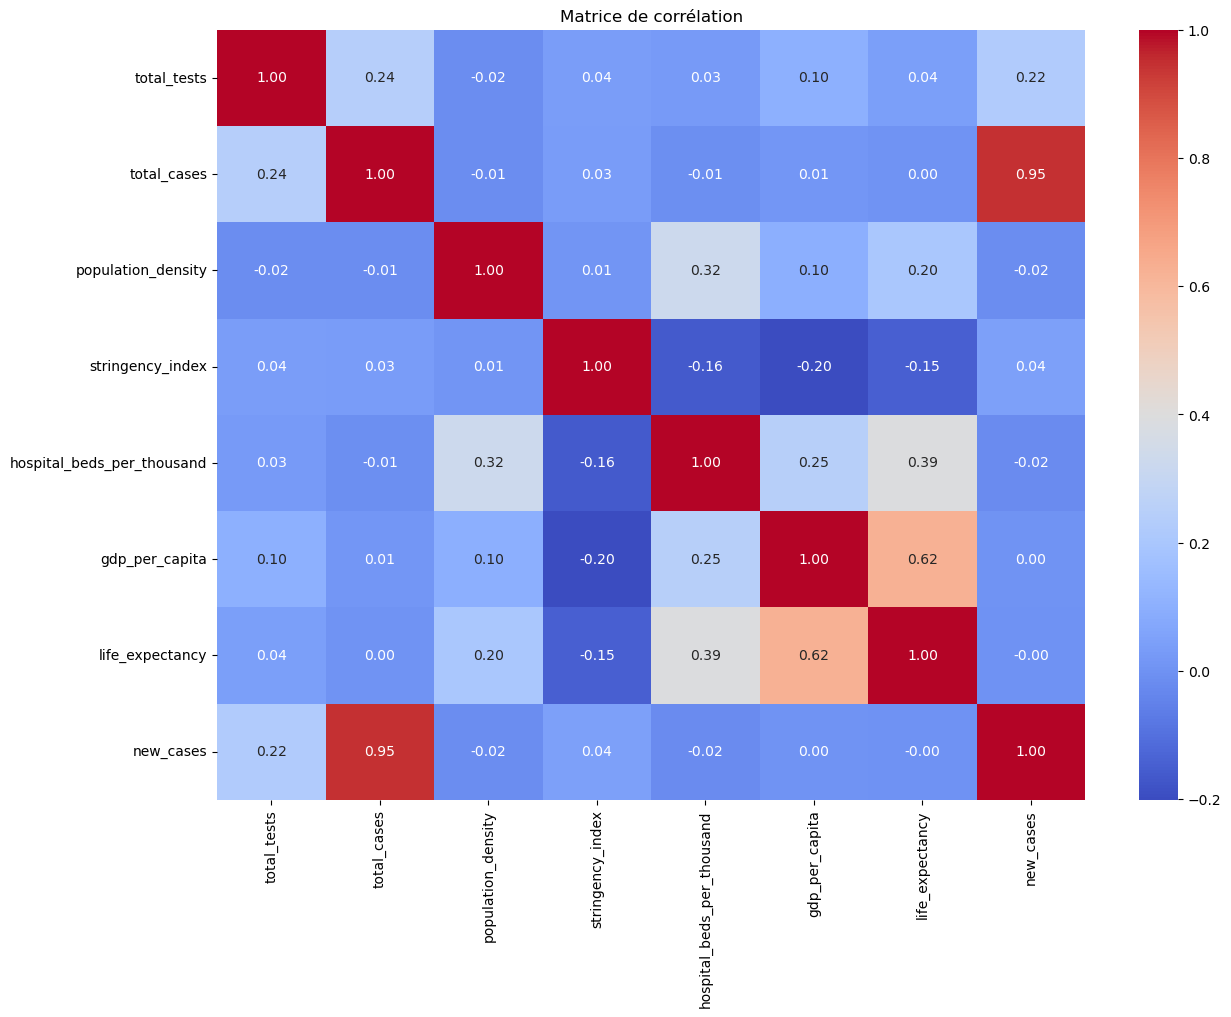


Paires de variables fortement corrélées (correlation > 0.7) :
total_cases  new_cases      0.948306
new_cases    total_cases    0.948306
dtype: float64


In [131]:
# 1. Calculer la matrice de corrélation
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()

# 2. Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matrice de corrélation')
plt.show()

# 3. Identifier les paires de variables fortement corrélées
threshold = 0.7  # Seuil pour les corrélations fortes
strong_correlations = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1)]

# Afficher les paires fortement corrélées
print("\nPaires de variables fortement corrélées (correlation > 0.7) :")
print(strong_correlations.unstack().dropna().sort_values(ascending=False))


In [119]:
data.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64


In [121]:
# Enregistrement de la nouvelle base nettoyée sous covid_cleaned.csv
data.to_csv('covid_cleaned.csv', index=False)

# Préparation des données pour la régression linéaire

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Sélection des variables (features et target)
# Supposons que nous voulons prédire "new_cases"
features = data.drop(columns=['new_cases'])  # Supprimer les colonnes inutiles
target = data['new_cases']

# 2. Encodage des colonnes catégoriques
# Encoder les colonnes catégoriques comme "continent" (si elle existe)
if 'continent' in features.columns:
    le = LabelEncoder()
    features['continent'] = le.fit_transform(features['continent'])

# 3. Normalisation des données numériques
scaler = StandardScaler()
numeric_cols = features.select_dtypes(include=np.number).columns
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

# 4. Division des données
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Affichage des formes des données
print("Forme des ensembles d'entraînement et de test :")
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}, y_test : {y_test.shape}")

Forme des ensembles d'entraînement et de test :
X_train : (11258, 5), X_test : (2815, 5)
y_train : (11258,), y_test : (2815,)


# Prédiction avec Régression linéaire

Évaluation finale du modèle :
Mean Squared Error (MSE): 19710859.305759575
Mean Absolute Error (MAE): 1599.9145781161667
R-squared (R²): 0.5848984876395176


C:\Users\ROG\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


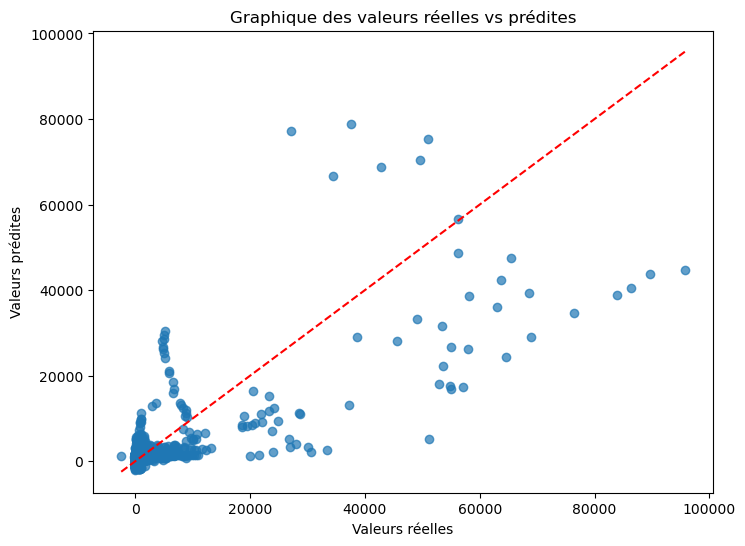

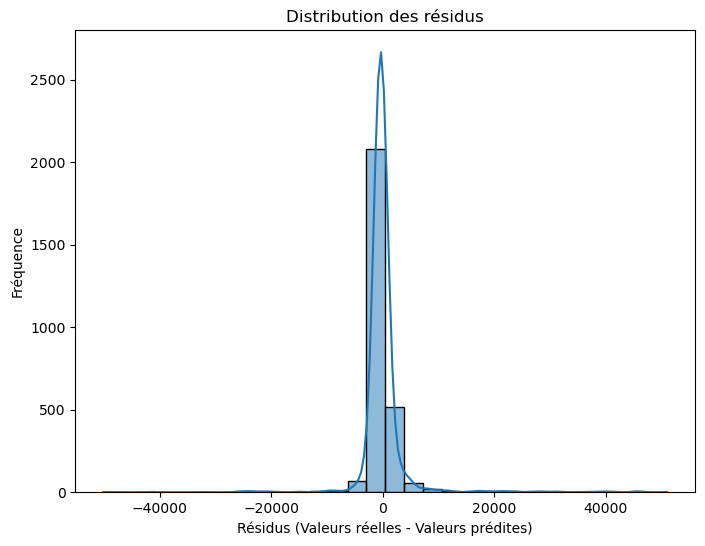

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# 2. Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Évaluation finale du modèle :")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# 3. Visualisation des résultats
# a) Valeurs réelles vs prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne parfaite
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique des valeurs réelles vs prédites')
plt.show()

# b) Résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution des résidus')
plt.xlabel('Résidus (Valeurs réelles - Valeurs prédites)')
plt.ylabel('Fréquence')
plt.show()


# Préparation des données pour Random forest

In [173]:
# **1. Sélection des variables pertinentes**
selected_features = [
    'total_tests',          # Total des tests réalisés
    'population_density',   # Densité de population
    'stringency_index',     # Indice de rigueur
    'hospital_beds_per_thousand',  # Lits d'hôpital pour 1 000 habitants
    'gdp_per_capita'        # PIB par habitant
]

# Supprimer les lignes ayant des valeurs manquantes
data = data[selected_features + ['new_cases']].dropna()

# **2. Séparation des caractéristiques (X) et de la cible (y)**
X = data[selected_features]
y = data['new_cases']

# **3. Division en ensembles d'entraînement et de test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Normalisation des données**
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Prédiction avec Random Forest

Évaluation finale du modèle Random Forest :
Mean Squared Error (MSE): 828974.6616385604
Mean Absolute Error (MAE): 294.38465851028656
R-squared (R²): 0.9825421799010997


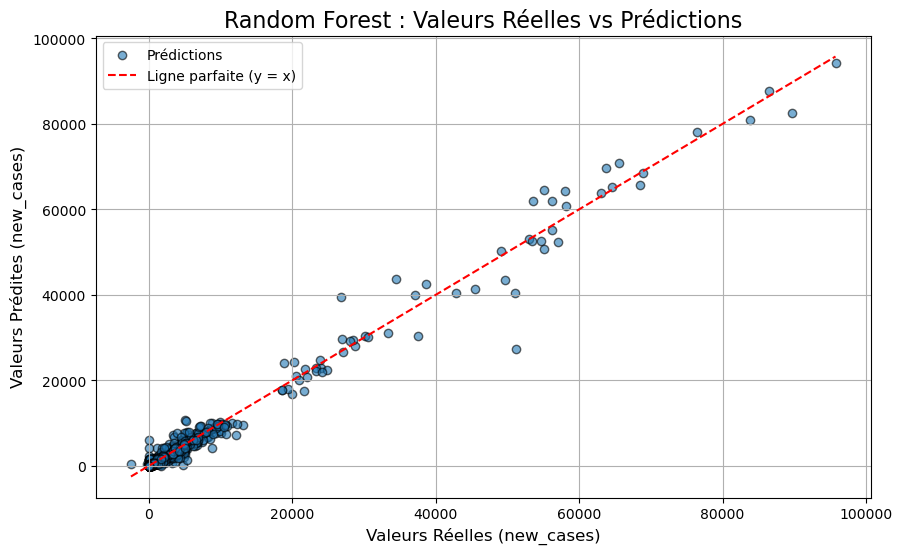

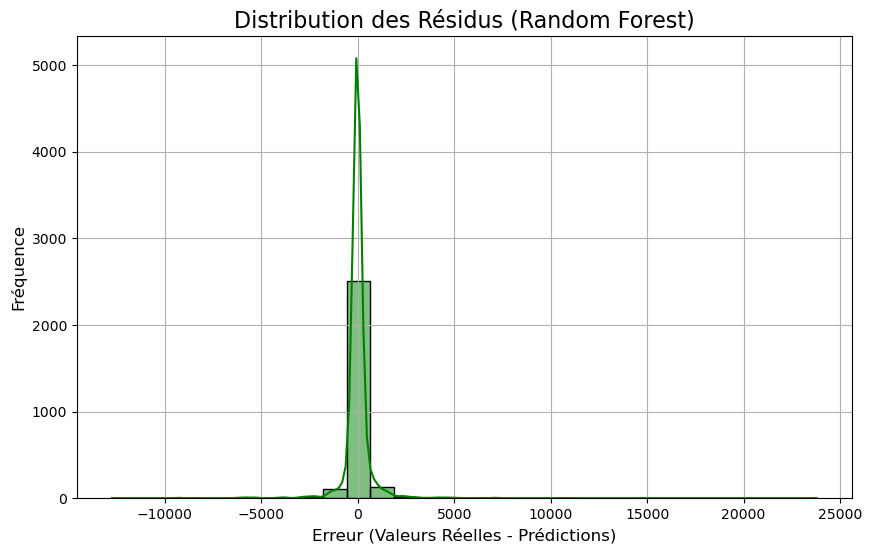

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Initialisation du modèle Random Forest**
rf_model = RandomForestRegressor(
    n_estimators=100,  # Nombre d'arbres dans la forêt
    max_depth=10,      # Limite de profondeur pour éviter le surapprentissage
    random_state=42    # Répétabilité des résultats
)

# **2. Entraînement du modèle**
rf_model.fit(X_train, y_train)

# **3. Prédictions**
y_pred_rf = rf_model.predict(X_test)

# **4. Évaluation des performances**
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Évaluation finale du modèle Random Forest :")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")

# **5. Visualisation des résultats**

# Graphique des valeurs réelles vs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolors="k", label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ligne parfaite (y = x)")
plt.title("Random Forest : Valeurs Réelles vs Prédictions", fontsize=16)
plt.xlabel("Valeurs Réelles (new_cases)", fontsize=12)
plt.ylabel("Valeurs Prédites (new_cases)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Distribution des résidus
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, bins=30, color="green")
plt.title("Distribution des Résidus (Random Forest)", fontsize=16)
plt.xlabel("Erreur (Valeurs Réelles - Prédictions)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(True)
plt.show()